<a href="https://colab.research.google.com/github/AmiyaRegi/Project-LuminarTechnolab/blob/main/ML_CL_KNN%2CSVM%2CNV_Lung_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
import pandas as pd


df=pd.read_csv('/content/lung_cancer_examples.csv')
df.head()

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,20,2,5,1
2,Camela,Anderson,30,0,5,2,0
3,Alex,Telles,28,0,8,1,0
4,Diego,Maradona,68,4,5,6,1


In [ ]:
df.isna().sum()

Name       0
Surname    0
Age        0
Smokes     0
AreaQ      0
Alkhol     0
Result     0
dtype: int64

In [ ]:
#Input data
x=df.iloc[:,2:-1].values
x



array([[35,  3,  5,  4],
       [27, 20,  2,  5],
       [30,  0,  5,  2],
       [28,  0,  8,  1],
       [68,  4,  5,  6],
       [34,  0, 10,  0],
       [58, 15, 10,  0],
       [22, 12,  5,  2],
       [45,  2,  6,  0],
       [52, 18,  4,  5],
       [33,  4,  8,  0],
       [18, 10,  6,  3],
       [25,  2,  5,  1],
       [28, 20,  2,  8],
       [34, 25,  4,  8],
       [39, 18,  8,  1],
       [42, 22,  3,  5],
       [19, 12,  8,  0],
       [62,  5,  4,  3],
       [73, 10,  7,  6],
       [55, 15,  1,  3],
       [33,  8,  8,  1],
       [22, 20,  6,  2],
       [44,  5,  8,  1],
       [77,  3,  2,  6],
       [21, 20,  5,  3],
       [37, 15,  6,  2],
       [34, 12,  8,  0],
       [55, 20,  1,  4],
       [40, 20,  2,  7],
       [36, 13,  5,  2],
       [56, 20,  3,  3],
       [47, 15,  1,  8],
       [62, 25,  3,  4],
       [26, 10,  7,  2],
       [25, 20,  8,  2],
       [59, 20,  3,  4],
       [62, 15,  5,  5],
       [33, 25,  8,  2],
       [37, 10,  5,  3],


In [ ]:
#Output data
y=df.iloc[:,-1].values
y

array([1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0])

In [ ]:
#Splitting Dataset into Train & Test Datasets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)


In [ ]:
#Naive Bayes model
from sklearn.naive_bayes import GaussianNB
model1=GaussianNB()
model1.fit(x_train,y_train)
y_pred=model1.predict(x_test)
y_pred



array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0])

In [ ]:
print(model1.predict([[62,5,4,3]]))

[1]


In [ ]:

##Evaluating Model -Accuracy Score and Confusion Matrix 
from sklearn.metrics import accuracy_score,confusion_matrix
result=confusion_matrix(y_test,y_pred)
score=accuracy_score(y_test,y_pred)
print(result)
print(score)

[[11  0]
 [ 0  7]]
1.0


In [ ]:
#KNN model
from sklearn.neighbors import KNeighborsClassifier
model2=KNeighborsClassifier(n_neighbors=3)
model2.fit(x_train,y_train)
y_pred=model2.predict(x_test)
y_pred



array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0])

In [ ]:
print(model2.predict([[62,5,4,3]]))

[1]


[[11  0]
 [ 0  7]]
1.0


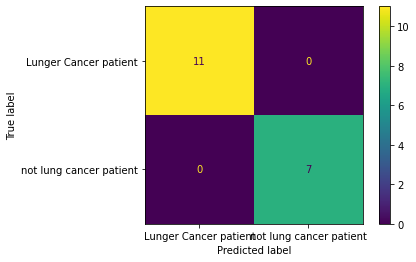

In [ ]:
#Evaluating Model -Accuracy Score and Confusion Matrix and ConfusionMatrixDisplay
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
from sklearn.metrics import classification_report,accuracy_score,ConfusionMatrixDisplay
labels=[ 'Lunger Cancer patient','not lung cancer patient']
result=confusion_matrix(y_test,y_pred)
cm=ConfusionMatrixDisplay(result,display_labels=labels)
cm.plot()
score=accuracy_score(y_test,y_pred)
print(result)
print(score)

In [ ]:
#SVM
from sklearn.svm import SVC
model3=SVC()
model3.fit(x_train,y_train)
y_pred=model3.predict(x_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0])

In [ ]:

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
accuracy=accuracy_score(y_pred,y_test)
print(accuracy)
cm=confusion_matrix(y_pred,y_test)
print(cm)
report=classification_report(y_pred,y_test)
print(report)

1.0
[[11  0]
 [ 0  7]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         7

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18

